# Hosam Wajeeh

#### Task 2: Predict the optimal number of clusters and present it visually on the Iris Dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('Iris.csv')
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
dataset.drop(['Id'], axis=1, inplace=True)

In [4]:
dataset.shape

(150, 5)

In [5]:
dataset.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Since were gonna do clustering we only need the features 

In [7]:
X = dataset[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalLengthCm']]
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalLengthCm
0,5.1,3.5,1.4,1.4
1,4.9,3.0,1.4,1.4
2,4.7,3.2,1.3,1.3
3,4.6,3.1,1.5,1.5
4,5.0,3.6,1.4,1.4


Using PCA to reduce the dimensions to 2

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
 
#Transform the data
X = pd.DataFrame(pca.fit_transform(X))
X.head()

,0,1
0,-3.431920,0.315725
1,-3.454661,-0.178938
2,-3.660044,-0.150349
3,-3.410929,-0.332658
4,-3.466954,0.319383


In [9]:
X.shape

(150, 2)

# K-Means Clustering

Using the elbow method to find the optimal number of clusters

C:\Users\hosam\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


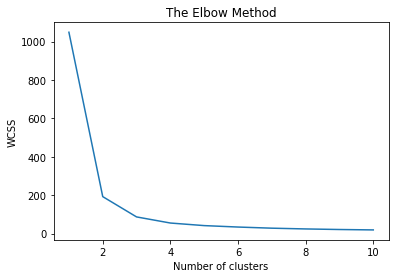

In [10]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Optimal number of clusters is 3

In [11]:
#Training the K-Means model on the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(X)

### Visualising the clusters

In [12]:
#filtering rows of original data
label1 = X[y_kmeans == 0]
label2 = X[y_kmeans == 1]
label3 = X[y_kmeans == 2]

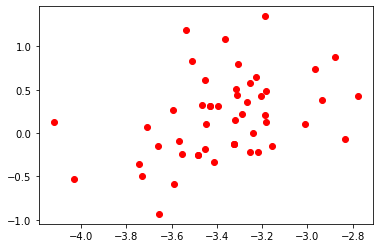

In [13]:
plt.scatter(label1[0] , label1[1] , color = 'red') #Cluster 1 Vis

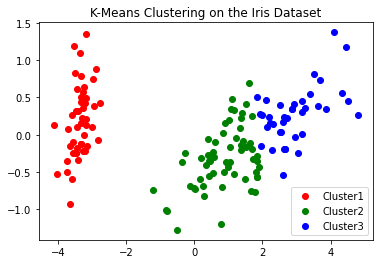

In [14]:
#Plotting the results
plt.scatter(label1[0] , label1[1] , color = 'red', label = 'Cluster1')
plt.scatter(label2[0] , label2[1] , color = 'green', label = 'Cluster2')
plt.scatter(label3[0] , label3[1] , color = 'blue', label = 'Cluster3')
plt.legend()
plt.title('K-Means Clustering on the Iris Dataset')
plt.show()

# Hierarchical Clustering

Using the Dendrogram method to get the optimal number of clusters

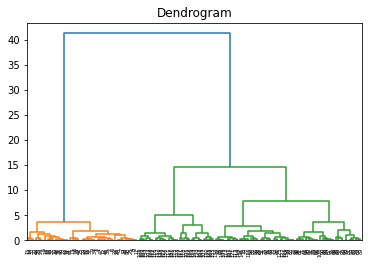

In [15]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.show()

In [16]:
#Training the Hierarchical Clustering model on the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

### Visualising the Clusters

In [17]:
#filtering rows of original data
label1 = X[y_hc == 0]
label2 = X[y_hc == 1]
label3 = X[y_hc == 2]

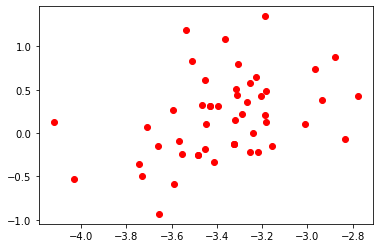

In [18]:
plt.scatter(label1[0] , label1[1] , color = 'red') #Cluster 1 Vis

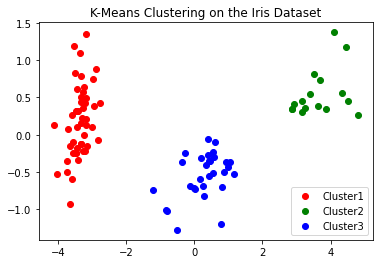

In [19]:
#Plotting the results
plt.scatter(label1[0] , label1[1] , color = 'red', label = 'Cluster1')
plt.scatter(label2[0] , label2[1] , color = 'green', label = 'Cluster2')
plt.scatter(label3[0] , label3[1] , color = 'blue', label = 'Cluster3')
plt.legend()
plt.title('K-Means Clustering on the Iris Dataset')
plt.show()

# Conclusion

The optimal number of clusters is 3